In [5]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [10]:
# prompt: df

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
X =df.iloc[: , 3:13]

In [13]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [14]:
y= df.iloc[: , 13]

In [15]:
# Feature engg

In [16]:
Geography = pd.get_dummies(X['Geography'] , drop_first=True)

In [17]:
Gender = pd.get_dummies(X['Gender'] , drop_first=True)

In [18]:
X = X.drop(['Geography' , 'Gender'] , axis=1 )

In [19]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [20]:
X = pd.concat([X , Geography ,Gender] , axis=1 )

In [21]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Germany          10000 non-null  uint8  
 9   Spain            10000 non-null  uint8  
 10  Male             10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

### Create ANN model structure

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import ReLU


In [36]:
input_shape = (11,)

In [41]:
model = Sequential()

In [42]:
model.add(Dense(units=50  , activation='relu' , input_shape = input_shape))
model.add(Dropout(0.3))

In [43]:
# hidden layer

model.add(Dense(units= 80 , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=50 , activation='relu'))
model.add(Dropout(0.2))

In [45]:
# add output layer
model.add(Dense(units=1 , activation='sigmoid'))

In [46]:
# compile the model

model.compile(optimizer='Adam' , loss='binary_crossentropy' , metrics='accuracy')

In [ ]:
# train the model

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False , verbose= 1)

In [49]:
model_history =model.fit(X_train , y_train , epochs= 1000 , batch_size=20 , validation_data=(X_test , y_test)  , validation_split=0.3 , callbacks=early_stopping)

Epoch 1/1000
400/400 [==============================] - 8s 5ms/step - loss: 0.6498 - accuracy: 0.7491 - val_loss: 0.6056 - val_accuracy: 0.7975
Epoch 2/1000
400/400 [==============================] - 2s 4ms/step - loss: 0.5784 - accuracy: 0.7960 - val_loss: 0.5545 - val_accuracy: 0.7975
Epoch 3/1000
400/400 [==============================] - 2s 5ms/step - loss: 0.5405 - accuracy: 0.7960 - val_loss: 0.5270 - val_accuracy: 0.7975
Epoch 4/1000
400/400 [==============================] - 2s 4ms/step - loss: 0.5090 - accuracy: 0.7960 - val_loss: 0.4883 - val_accuracy: 0.7975
Epoch 5/1000
400/400 [==============================] - 2s 5ms/step - loss: 0.4838 - accuracy: 0.7960 - val_loss: 0.4679 - val_accuracy: 0.7975
Epoch 6/1000
400/400 [==============================] - 2s 5ms/step - loss: 0.4658 - accuracy: 0.7960 - val_loss: 0.4603 - val_accuracy: 0.7975
Epoch 7/1000
400/400 [==============================] - 2s 6ms/step - loss: 0.4593 - accuracy: 0.7960 - val_loss: 0.4453 - val_accuracy:

In [50]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


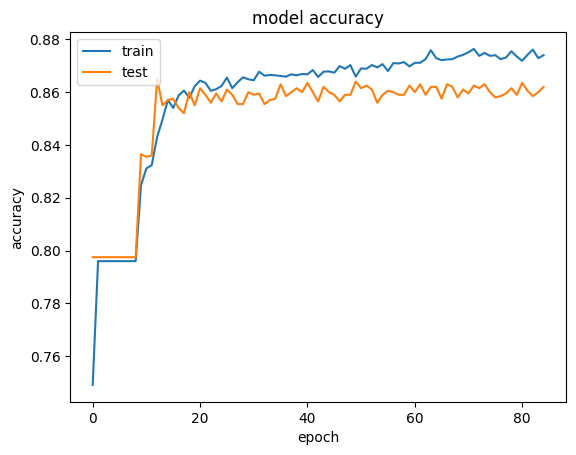

In [51]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

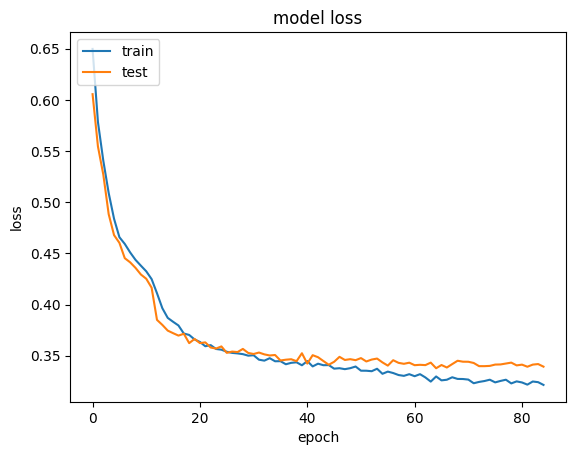

In [52]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
# make the prediction

In [60]:
y_pred =model.predict(X_test )
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [58]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [61]:
accuracy_score(y_test , y_pred)

0.862

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1521,   74],
       [ 202,  203]])